In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
# data = pd.read_csv(r'C:\Users\nates\Documents\Jupyter Notebooks\PH 482 Machine Learning\Modified Files\agaricus-lepiota.data')
data = pd.read_csv(url)


In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
data.shape

(8124, 23)

In [6]:

from sklearn.preprocessing import LabelEncoder
def label_encoded(features): # Go through features and convert them to numerical values, rather than letters. Use in loop
    le = LabelEncoder()
    le.fit(features)
    print(features.name,le.classes_)
    return le.transform(features)

for col in data.columns:
    data[str(col)] = label_encoded(data[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [7]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [8]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30)

In [10]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape", y_test.shape)


X_train shape: (5686, 22)
X_test shape: (2438, 22)
y_train shape: (5686,)
y_test shape (2438,)


In [11]:
# Make tree, going to do a gridsearch and try to find best hyperparameters that way
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 
          'min_samples_split': [2, 3, 4],
          'max_depth': list(range(1,15))
         }
grid_search = GridSearchCV(DecisionTreeClassifier(), params, verbose=1)

In [12]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4116 candidates, totalling 20580 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 20580 out of 20580 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [13]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
grid_tree = grid_search.best_estimator_

In [15]:
pip install graphviz

In [16]:
class_names = grid_tree.classes_

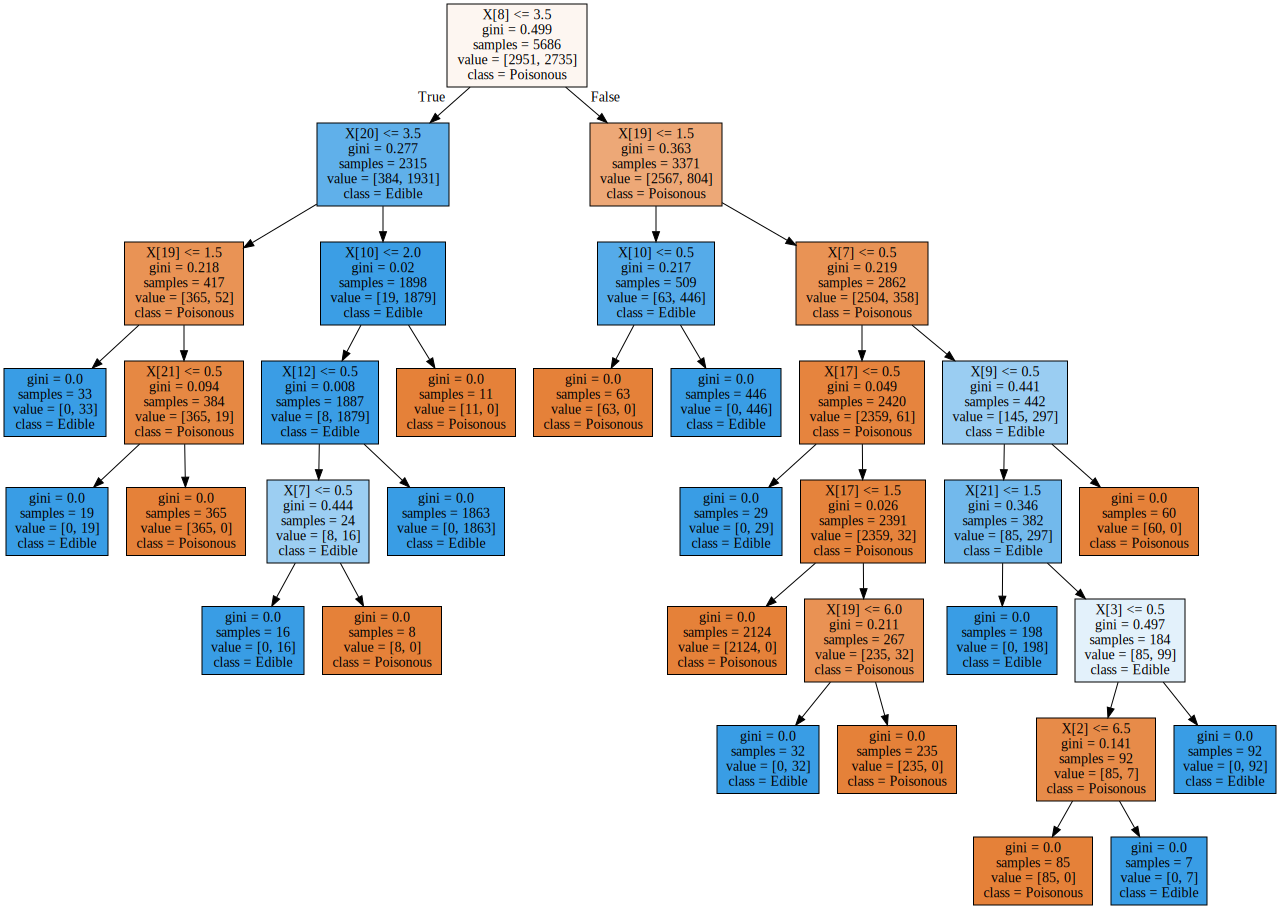

In [17]:
import graphviz
dot_data = tree.export_graphviz(grid_tree, out_file=None, class_names = ('Poisonous','Edible'), filled=True)
#dot_data = tree.export_graphviz(grid_tree, out_file=None, class_names = True, filled=True)


# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [18]:
y_pred = grid_tree.predict(X_test)

In [19]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Test ROC AUC: 1.0


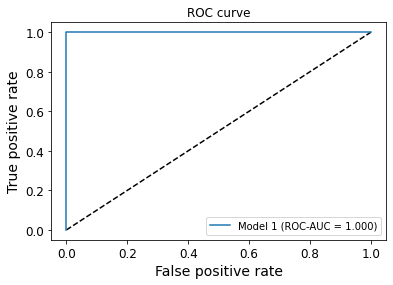

In [20]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
# Evaluate on test set
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('Test ROC AUC:', roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
#plt.legend(loc=2, prop={'size': 15})
plt.plot(fpr, tpr, label='Model 1 (ROC-AUC = {:.3f})'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Feature Importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00456
Feature: 3, Score: 0.02766
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.11389
Feature: 8, Score: 0.34302
Feature: 9, Score: 0.02208
Feature: 10, Score: 0.04653
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00185
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.02205
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.21096
Feature: 20, Score: 0.18034
Feature: 21, Score: 0.02706


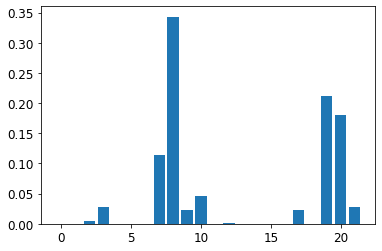

In [21]:

# get importance
importance = grid_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0
[[1040    0]
 [   0  991]]
1.0


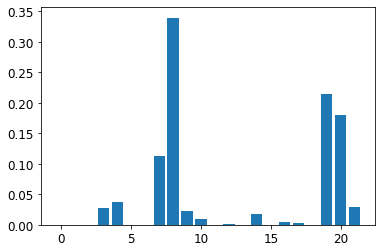


Feature: 1
[[ 21   1  15  28   0  67]
 [  1   0   0   0   0   0]
 [ 16   1 186  89  11 513]
 [ 12   0  71  60   0  39]
 [  0   0   0   0   8   0]
 [ 44   0 263  93  12 480]]
0.37173806006893156


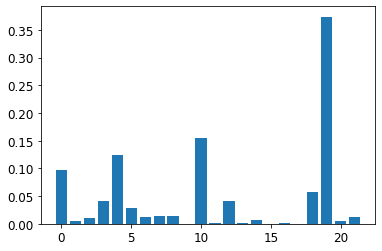


Feature: 2
[[316   0  86 179]
 [  0   0   0   2]
 [125   0 378 146]
 [262   0 259 278]]
0.47858197932053176


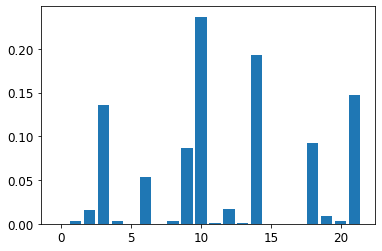


Feature: 3
[[ 13   0   0   6   2   5   0   0   7   0]
 [  0   1   0   0   5   0   0   0   0   0]
 [  4   4  76  45 260   3   0   0   0   0]
 [ 29   0   0 120 174   0   0   0  42 103]
 [  4   2 149  58 282   4   0   0  42  32]
 [  4   0   0  11   5   1   0   0  12   0]
 [  0   0   0   0   0   0   0   3   2   0]
 [  0   0   0   0   0   0   1   0   1   0]
 [ 21   0   0  27  57   0   3   1  94  43]
 [  0   0   0 101   6   0   0   0  54 112]]
0.34416543574593794


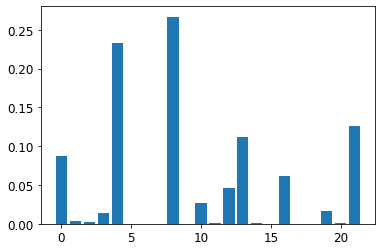


Feature: 4
[[1193    0]
 [   0  838]]
1.0


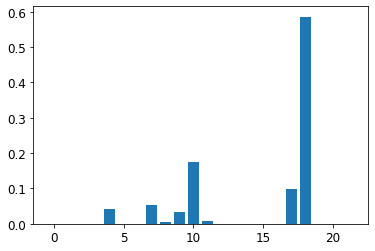


Feature: 5
[[ 50   0   0  53   0   0   0   0   0]
 [  0  43   0   0   0   0   0   0   0]
 [  0   0 462   0   0   0   0  64  19]
 [ 94   0   0  17   0   0   0   0   0]
 [  0   0   0   0   7   0   0   0   0]
 [  0   0   0   0   0 856   0   0   0]
 [  0   0   0   0   0   0  76   0   0]
 [  0   0  90   0   0   0   0  31  14]
 [  0   0  86   0   0   0   0  61   8]]
0.7631708517971443


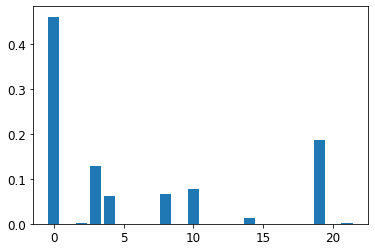


Feature: 6
[[  52    2]
 [   4 1973]]
0.9970457902511078


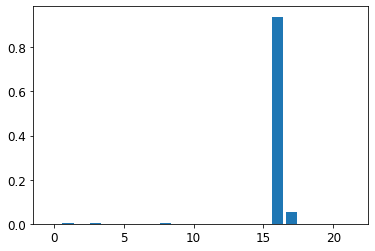


Feature: 7
[[1689   14]
 [  23  305]]
0.9817823732151649


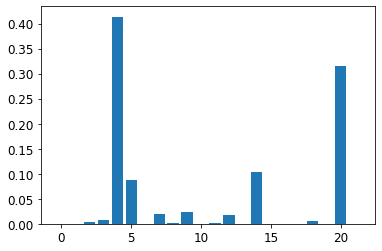


Feature: 8
[[1383    0]
 [  17  631]]
0.9916297390448056


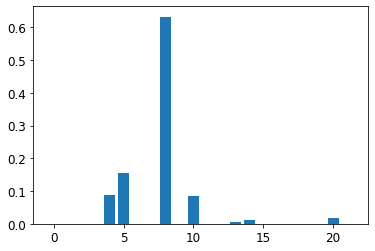


Feature: 9
[[430   0   0   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0   0   0  15   0]
 [  0   0  38  37   3   7   0  60   0   3  51   0]
 [  0   0  41  34  11  21   0  77   0   0  12   0]
 [  0   0   0  22   4  51   0   5   0   0  35   0]
 [  0   0   6  23  15  51   6   9   0  55  70   2]
 [  0   0   0   0   0  17   2   0   0   0   0   2]
 [  0   0  60  60  12 107   0  31   0  55  68   0]
 [  0   0   0   0   0   0   0   0   0   0   7   0]
 [  0   0  10   1   0  26   0   1   0  34  47   0]
 [  0   8   6  10   0  65   0  24   0  36 115   4]
 [  0   0   0   0   0  13   8   0   0   0   3   0]]
0.3663220088626292


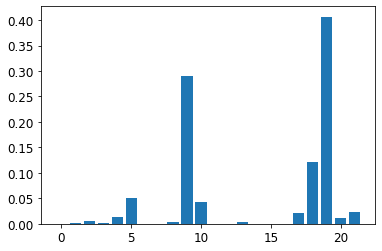


Feature: 10
[[ 863   36]
 [   0 1132]]
0.982274741506647


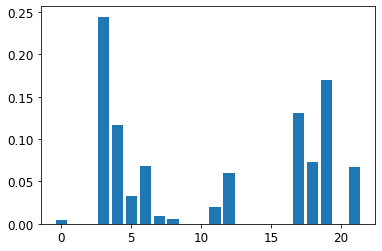


Feature: 11
[[615   0   0   0   0]
 [  0 910   0  22   0]
 [  0   0 141   0   0]
 [  0   0   0 293   0]
 [  0   0   0   0  50]]
0.9891678975873953


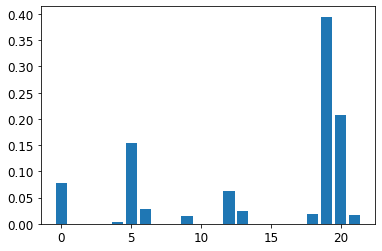


Feature: 12
[[  37    0  100    0]
 [   0  515   75    0]
 [  73  220 1005    0]
 [   0    0    0    6]]
0.7695716395864106


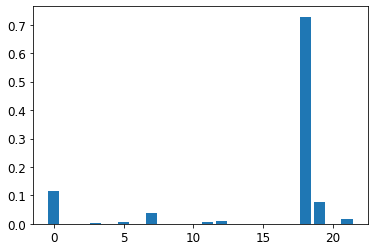


Feature: 13
[[ 47   0  97   0]
 [  0 446 136   0]
 [ 69 185 977   0]
 [  0   0   5  69]]
0.757754800590842


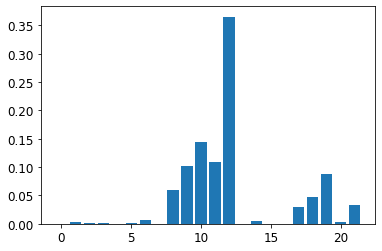


Feature: 14
[[ 23   0   0   0  47   0  36   0   0]
 [  0   7   0   0   0   0   0   0   0]
 [  0   0   7   0   0   0   0  12   0]
 [  0   0   0  31   0   0  22  82   0]
 [ 49   0   0   0  30   0  34   0   0]
 [  0   0   0   0   0  51   0   0   0]
 [ 49   0   0  41  48   0  90 252   0]
 [  0   0  15  49   0   0 142 913   0]
 [  0   0   0   0   0   0   0   0   1]]
0.567700640078779


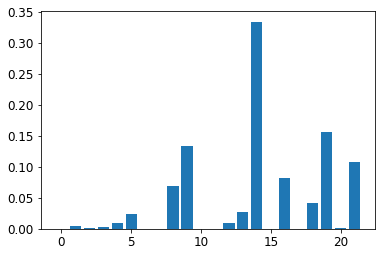


Feature: 15
[[ 46   0   0   0  12   0  45   0   0]
 [  0   7   0   0   0   0   0   0   0]
 [  0   0   5   0   0   0   0  13   0]
 [  0   0   0  29   0   0  71  44   0]
 [ 77   0   0   0  27   0  34   0   4]
 [  0   0   0   0   0  51   0   0   0]
 [ 59   0   0  58  18   0 163 157   0]
 [  0   0  13  47   0   0 236 808   0]
 [  0   0   0   0   5   0   0   0   2]]
0.5603151157065485


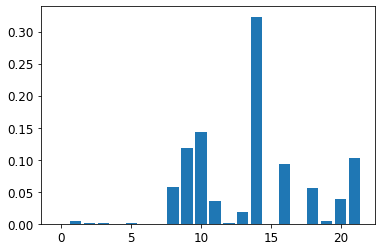


Feature: 16
[[2031]]
1.0


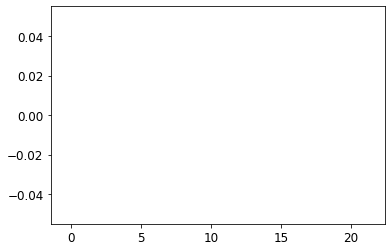


Feature: 17
[[   5   15    0    0]
 [  26    5    0    0]
 [   0    0 1979    0]
 [   0    0    0    1]]
0.9798129000492368


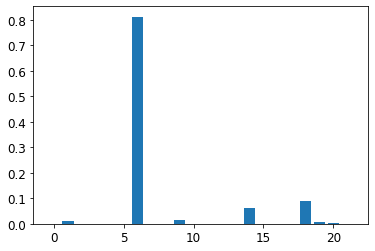


Feature: 18
[[   7    0    0]
 [   0 1883    0]
 [   0    0  141]]
1.0


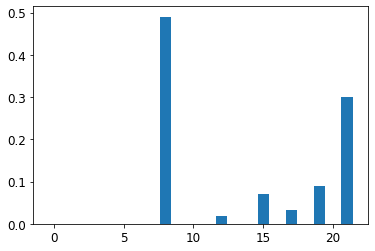


Feature: 19
[[ 677    0    0    0    0]
 [   0   11    0    0    0]
 [   0    0  330    0    0]
 [   0    0    0    7    0]
 [   0    0    0    0 1006]]
1.0


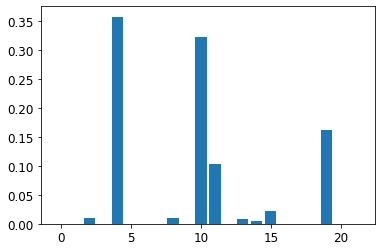


Feature: 20
[[  0   0   0  10   3   0   0   0   1]
 [  0 416   0   0   0   0   0   0   0]
 [  0   0 153 320   0   0   0   0   0]
 [  7   0 201 269   3   0   0   0   2]
 [  5   0   0   4   0   0   0   0   1]
 [  0   0   0   0   0  16   0   0   0]
 [  0   0   0  17   0   0   0   0   0]
 [  0   0   0   0   0   0   0 588   0]
 [  8   0   0   6   1   0   0   0   0]]
0.7099950763170851


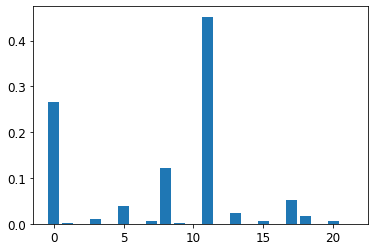


Feature: 21
[[ 35   0   0  58   0   0]
 [  0  62   0   0  12   0]
 [  0   0  34  69   0   0]
 [ 73   0  58 103  77  20]
 [  0  19   0  52 539 416]
 [  0   0   0  15  20 369]]
0.5622845888724766


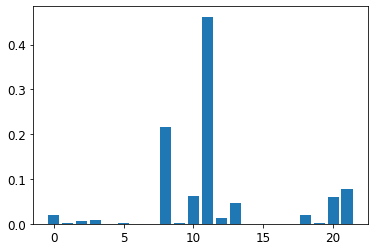

In [22]:
for i in range(0, len(X[0])):
#     X_curr = data.iloc[:,0:i].values + data.iloc[:,i+1:].values
    X_curr = np.hstack((data.iloc[:,0:i].values,data.iloc[:,i+1:].values))
#     X_curr = data.iloc[:,:].values
#     X_curr[:,i] = 0
# #     X_curr[i].values[:] = 0
    y_curr = data.iloc[:,i].values
    
    X_train_curr, X_test_curr, y_train_curr, y_test_curr = train_test_split(X_curr, y_curr, test_size=0.25, random_state=42)
    
    tree_clf_curr = DecisionTreeClassifier(random_state=42, max_depth=7)
    tree_clf_curr.fit(X_train_curr, y_train_curr)
    
    predictions_curr = tree_clf_curr.predict(X_test_curr)
    print("Feature:", i)
    print(confusion_matrix(y_test_curr, predictions_curr))
    print(accuracy_score(y_test_curr, predictions_curr))

    # get importance
    importance = tree_clf_curr.feature_importances_
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    print()

# Multiclass Classification

### Image preparation:

In [ ]:
## Source: https://www.youtube.com/watch?v=j-3vuBynnOE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 ## Open Anaconda Prompt and enter "pip install opencv-python"

## Make sure to put an "r" in fron of the your directory if you get a unicode error.
DATADIR =  r"C:\Users\Lael\PH482\PH482_582\Machine Learning Final Project - Copy\Mushrooms"
CATEGORIES = ["Agaricus", "Amanita", "Boletus", "Cortinarius", "Entoloma", "Hygrocybe", "Lactarius", "Russula", "Suillus"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Path to cats or dogs directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img)) ## If color is not important, instead use img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GREYSCALE)
        plt.imshow(img_array) ## If color is not important, instead use plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
        

In [ ]:
print(img_array.shape)

(600, 778, 3)


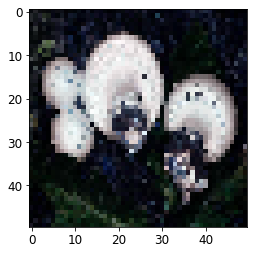

In [ ]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array) ## If color is not important, instead use plt.imshow(new_array, cmap="gray")
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Path to cats or dogs directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img)) # If color is not important, instead use img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GREYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    
create_training_data()
    

In [ ]:
print(len(training_data))

6714


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

6
6
6
7
7
3
6
1
7
3


In [ ]:
X = []
y = []

In [ ]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [ ]:
X[1]

array([[[128,  95,  84],
        [157, 146, 138],
        [ 15,   8,   4],
        ...,
        [177, 161, 160],
        [138, 114, 122],
        [ 69,  97,  85]],

       [[162, 110,  84],
        [ 65,  66,  55],
        [144, 123, 111],
        ...,
        [ 43,  16,  11],
        [103,  91, 102],
        [ 19,  11,  10]],

       [[ 74,  42,  39],
        [150, 110,  81],
        [123, 116, 103],
        ...,
        [142, 124, 134],
        [ 72,  90,  57],
        [ 35,  83,  44]],

       ...,

       [[ 98,  77,  76],
        [ 99,  77,  79],
        [ 71,  64,  71],
        ...,
        [ 50, 187,  94],
        [ 37, 140,  60],
        [ 91, 212, 126]],

       [[101,  90,  95],
        [ 79,  72,  79],
        [ 72,  59,  61],
        ...,
        [186, 211, 138],
        [ 41, 132,  62],
        [ 73, 214, 119]],

       [[ 95,  89,  95],
        [ 70,  63,  67],
        [ 78,  66,  60],
        ...,
        [ 88, 155,  80],
        [ 60, 194, 111],
        [ 26, 117,  39]]

353   750   1073   836   364   316   1563   1148   311
6714
6714
0.0525767053917188   0.11170688114387846   0.1598153112898421   0.12451593684837653   0.05421507298182902   0.04706583258862079   0.23279714030384271   0.17098599940422995   0.046321120047661604


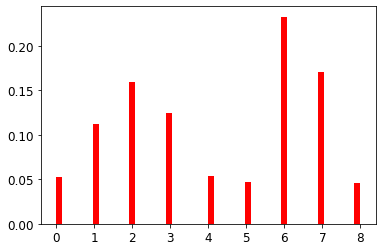

In [ ]:
a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=0
i=0
for j in range(len(y)):
    if y[j]==0:
        a=a+1
    elif y[j]==1:
        b=b+1
    elif y[j]==2:
        c=c+1
    elif y[j]==3:
        d=d+1
    elif y[j]==4:
        e=e+1
    elif y[j]==5:
        f=f+1
    elif y[j]==6:
        g=g+1
    elif y[j]==7:
        h=h+1
    elif y[j]==8:
        i=i+1
print(a, " ", b, " ", c, " ", d, " ", e, " ", f, " ", g, " ", h, " ", i)
print(a+b+c+d+e+f+g+h+i)
print(len(y))
print(a/len(y), " ", b/len(y), " ", c/len(y), " ", d/len(y), " ", e/len(y), " ", f/len(y), " ", g/len(y), " ", h/len(y), " ", i/len(y))
weights = np.ones_like(y) / len(y)
plt.clf()
plt.hist(y, weights=weights, bins=50, color='r')
plt.show()

In [ ]:
# Above plot: shows percentage of mushrooms types

## ConvNet:

In [ ]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

In [ ]:
X = np.array(X)
y = np.array(y)

from tensorflow.python.keras.utils.np_utils import to_categorical
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#model = Sequential()
#model.add( Conv2D(64, (3,3)) )
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(9))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])



NameError: name 'X' is not defined

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Train on 4833 samples, validate on 538 samples
Epoch 1/10
4833/4833 [==============================] - 7s 1ms/sample - loss: 2.3270 - accuracy: 0.2533 - val_loss: 1.8244 - val_accuracy: 0.3457
Epoch 2/10
4833/4833 [==============================] - 7s 1ms/sample - loss: 1.6016 - accuracy: 0.4384 - val_loss: 1.7637 - val_accuracy: 0.3755
Epoch 3/10
4833/4833 [==============================] - 7s 1ms/sample - loss: 1.1124 - accuracy: 0.6398 - val_loss: 1.8483 - val_accuracy: 0.3680
Epoch 4/10
4833/4833 [==============================] - 7s 1ms/sample - loss: 0.6474 - accuracy: 0.8057 - val_loss: 2.0165 - val_accuracy: 0.3643
Epoch 5/10
4833/4833 [==============================] - 8s 2ms/sample - loss: 0.2771 - accuracy: 0.9419 - val_loss: 2.4407 - val_accuracy: 0.3810
Epoch 6/10
4833/4833 [==============================] - 8s 2ms/sample - loss: 0.1217 - accuracy: 0.9832 - val_loss: 2.6964 - val_accuracy: 0.3532
Epoch 7/10
4833/4833 [==============================] - 7s 1ms/sample - loss:

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
## Confusion Matrix:
## Source: https://www.youtube.com/watch?v=km7pxKy4UHU
rounded_predictions = model.predict_classes(X_test, batch_size=10, verbose=0)
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
for i in rounded_predictions:
    print(i)

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1), rounded_predictions)
def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ticks=[0,1])
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=1)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.2 0.1 0.  0.  0.  0.  0.4 0.2 0. ]
 [0.  0.3 0.1 0.1 0.  0.  0.2 0.2 0. ]
 [0.  0.1 0.5 0.1 0.  0.  0.2 0.1 0. ]
 [0.  0.1 0.2 0.2 0.  0.  0.3 0.1 0. ]
 [0.1 0.1 0.1 0.1 0.2 0.  0.3 0.2 0. ]
 [0.  0.  0.1 0.1 0.1 0.3 0.3 0.1 0. ]
 [0.  0.1 0.1 0.1 0.  0.  0.5 0.2 0. ]
 [0.  0.1 0.1 0.1 0.  0.  0.3 0.3 0. ]
 [0.  0.1 0.2 0.1 0.  0.  0.4 0.2 0. ]]


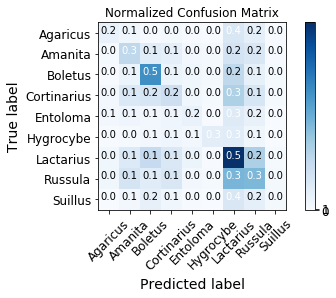

In [ ]:
plot_confusion_matrix(cm, CATEGORIES, title='Normalized Confusion Matrix')

In [ ]:
#Trying out other method

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_size = 256
train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(r'C:\Users\Lael\PH482\PH482_582\Machine Learning Final Project - Copy\Mushrooms_Split\Train', 
                                                    batch_size=32, 
                                                    target_size = (128,128),
                                                    class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(r'C:\Users\Lael\PH482\PH482_582\Machine Learning Final Project - Copy\Mushrooms_Split\Validation', 
                                                    batch_size=32,
                                                    target_size = (128,128),
                                                    class_mode = 'categorical')

Found 5373 images belonging to 9 classes.
Found 1341 images belonging to 9 classes.


In [ ]:
import tensorflow as tf
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle


model = Sequential()
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#model = Sequential()
#model.add( Conv2D(64, (3,3)) )
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(9))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 10 steps
Epoch 1/20
10/10 [==============================] - 15s 1s/step - loss: 1.8373 - accuracy: 0.3531 - val_loss: 2.4127 - val_accuracy: 0.2906
Epoch 2/20
10/10 [==============================] - 14s 1s/step - loss: 1.9362 - accuracy: 0.2875 - val_loss: 2.2084 - val_accuracy: 0.2719
Epoch 3/20
10/10 [==============================] - 15s 1s/step - loss: 1.8582 - accuracy: 0.3187 - val_loss: 2.1859 - val_accuracy: 0.3031
Epoch 4/20
10/10 [==============================] - 15s 2s/step - loss: 1.8801 - accuracy: 0.3094 - val_loss: 2.1507 - val_accuracy: 0.3313
Epoch 5/20
10/10 [==============================] - 14s 1s/step - loss: 1.8863 - accuracy: 0.3406 - val_loss: 2.2054 - val_accuracy: 0.3187
Epoch 6/20
10/10 [==============================] - 14s 1s/step - loss: 1.7913 - accuracy: 0.3750 - val_loss: 2.4651 - val_accuracy: 0.2875
Epoch 7/20
10/10 [==============================] - 15s 1s/step - lo

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))

#model = Sequential()
#model.add( Conv2D(64, (3,3)) )
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(9))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10
)

  ...
    to  
  ['...']
Train for 10 steps, validate for 10 steps
Epoch 1/20
10/10 [==============================] - 9s 927ms/step - loss: 30.9579 - accuracy: 0.1469 - val_loss: 11.8250 - val_accuracy: 0.0312
Epoch 2/20
10/10 [==============================] - 9s 858ms/step - loss: 4.2101 - accuracy: 0.1813 - val_loss: 2.3257 - val_accuracy: 0.1562
Epoch 3/20
10/10 [==============================] - 9s 858ms/step - loss: 2.1385 - accuracy: 0.2188 - val_loss: 2.1548 - val_accuracy: 0.2188
Epoch 4/20
10/10 [==============================] - 8s 850ms/step - loss: 2.1174 - accuracy: 0.2688 - val_loss: 2.1277 - val_accuracy: 0.2219
Epoch 5/20
10/10 [==============================] - 9s 857ms/step - loss: 2.1128 - accuracy: 0.2594 - val_loss: 2.1045 - val_accuracy: 0.2219
Epoch 6/20
10/10 [==============================] - 9s 851ms/step - loss: 2.1105 - accuracy: 0.2062 - val_loss: 2.0763 - val_accuracy: 0.2250
Epoch 7/20
10/10 [==============================] - 9s 859ms/step - loss: 2.054